In [63]:
#import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, model_selection, metrics
import seaborn as sns

In [42]:
#read data
df = pd.read_csv('C:\\Users\\mesam\\Downloads\\insurance.csv')
print(df.shape)

(1338, 7)


In [44]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


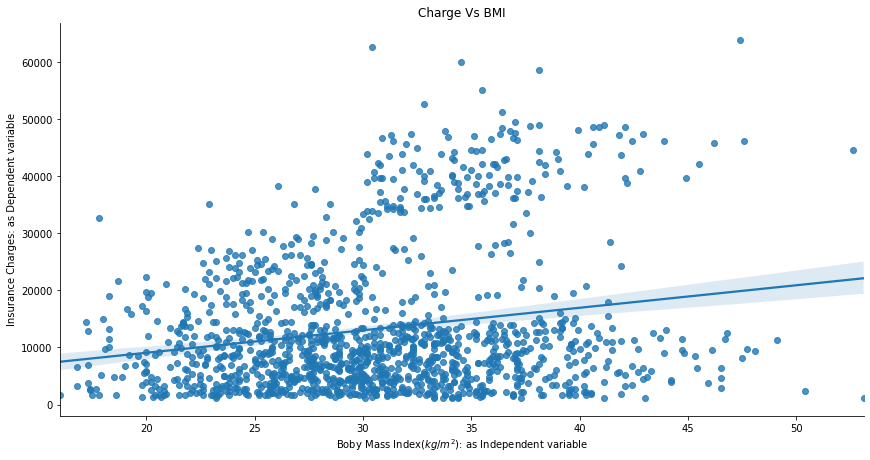

In [126]:
#for visualization purposes
sns.lmplot(x='bmi',y='expenses',data=df,aspect=2,height=6)
plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI');


Text(0.5, 1.0, 'Missing dataset values')

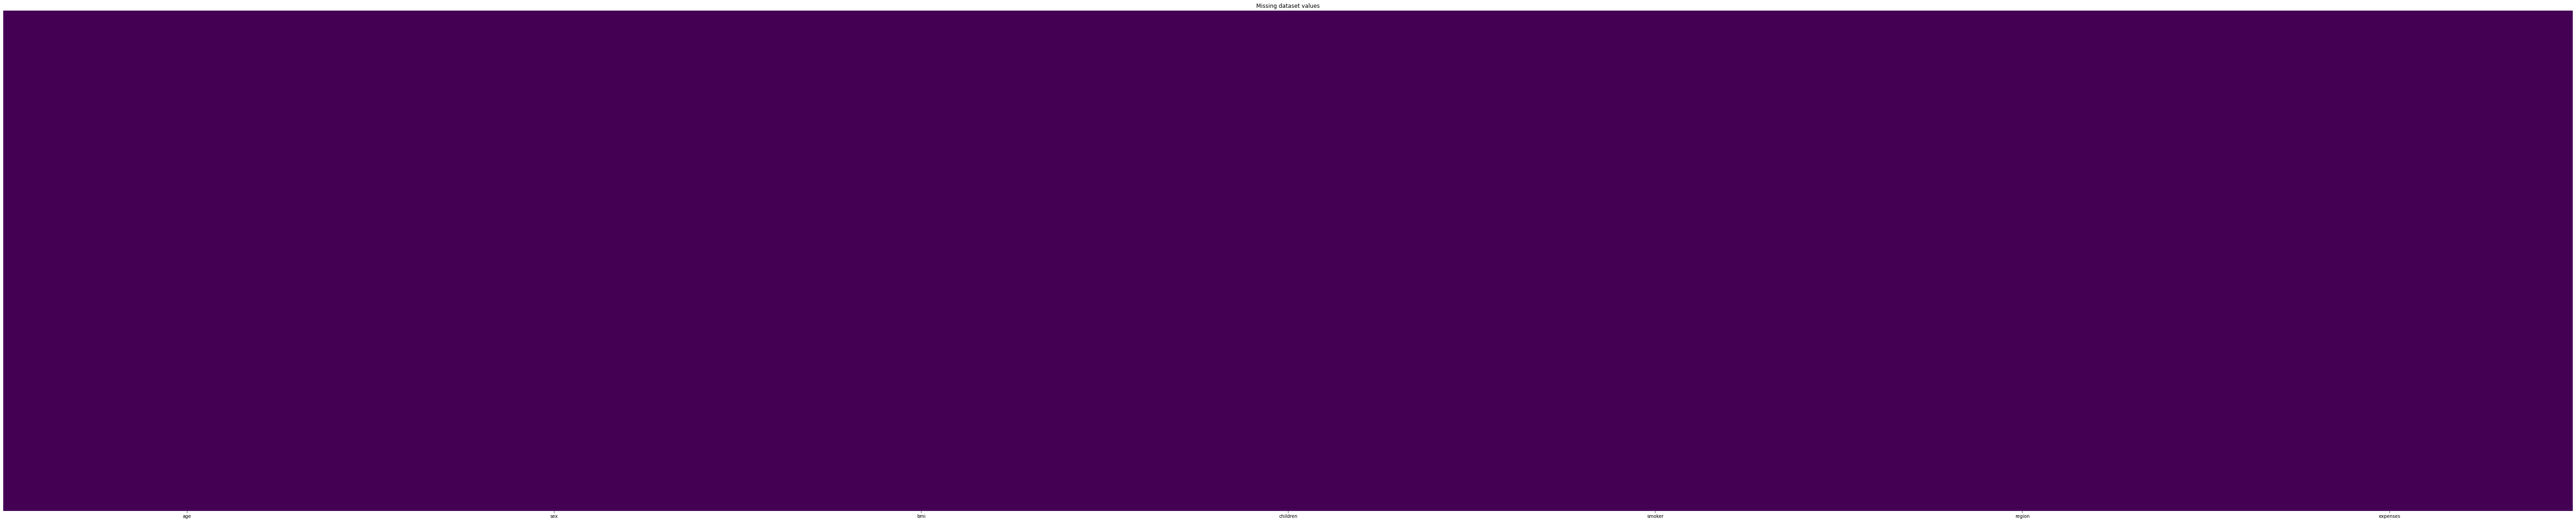

In [73]:
#to see if any data is missing
plt.figure(figsize=(100,20))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing dataset values")

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


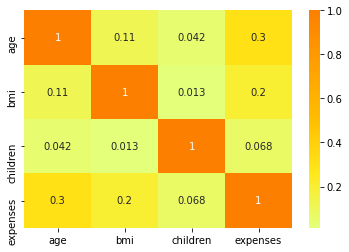

In [127]:
#correlation plot
corr = df.corr()
sns.heatmap(corr, cmap='Wistia', annot=True)
df.interpolate(method='linear')

In [128]:
#to do all three, lineencoding and onehotencoding and dummyvariable trap with just one function
categorical_columns = ['sex','children', 'smoker', 'region']
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
               dtype='int8')


In [129]:
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'expenses']

Number of rows and columns in the dataset: (1338, 7)

Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'expenses' 'OHE_male' 'OHE_1' 'OHE_2' 'OHE_3' 'OHE_4' 'OHE_5'
 'OHE_yes' 'OHE_northwest' 'OHE_southeast' 'OHE_southwest']

Number of rows and columns in the dataset: (1338, 13)


In [133]:
#box cox transformation
from scipy.stats import boxcox
y_bc, lam, ci = boxcox(df_encode['expenses'], alpha = 0.05)
df_encode['expenses'] = np.log(df_encode['expenses'])
ci, lam

((0.7995311080857427, 1.7912133192127242), 1.2940525489126828)

In [134]:
#trainig and testing set split
from sklearn.model_selection import train_test_split
X = df_encode.drop('expenses', axis = 1)
y = df_encode['expenses']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 23)

In [135]:
#now we have to add/ concatenate X0 that is [0 0 0 0...upto m] in our feature/ design matrix
#We are using the techinque of matrix derivatin of theta 
X_train_0 = np.c_[np.ones((X_train.shape[0], 1)), X_train] 
X_test_0 = np.c_[np.ones((X_test.shape[0], 1)), X_test] 
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train)) 
print(theta)

[ 1.97523568e+00  3.84421615e-03  1.34920380e-03 -8.56452338e-03
  1.90885671e-02  3.31337025e-02  2.98011752e-02  6.12311282e-02
  5.70506283e-02  1.65943315e-01 -6.22692416e-03 -1.71564403e-02
 -1.50320818e-02]


In [136]:
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})


In [137]:
#doing linear regression with python library to see the difference
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,1.975236,1.975236
1,theta_1,age,0.003844,0.003844
2,theta_2,bmi,0.001349,0.001349
3,theta_3,OHE_male,-0.008565,-0.008565
4,theta_4,OHE_1,0.019089,0.019089
5,theta_5,OHE_2,0.033134,0.033134
6,theta_6,OHE_3,0.029801,0.029801
7,theta_7,OHE_4,0.061231,0.061231
8,theta_8,OHE_5,0.057051,0.057051
9,theta_9,OHE_yes,0.165943,0.165943


In [138]:
#calculating R square and mean_sum_error
val = np.matmul(X_test_0, theta)
mese = np.sum((val - y_test)**2)/X_test_0.shape[0]
val1 = np.sum((val - y_test)**2)
val2 = np.sum((y_test - y_test.mean())**2)
r_sq = 1 - (val1/val2)
print(mese)
print(r_sq)

0.0024150393993302884
0.7737886995243107


In [139]:
#calculating the same with the help of inbuil library
from sklearn.metrics import mean_squared_error
regr = linear_model.LinearRegression() 
regr.fit(X_test, y_test)

y_pred = regr.predict(X_test)
J_mse = mean_squared_error(y_pred, y_test)
r_sq = regr.score(X_test, y_test)
print(J_mse)
print(r_sq)

0.0023242600355231507
0.782291798044717
